In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def save_ma_plot(df, title, filename):
    plt.figure(figsize=(8, 6))
    significant = df['padj'] < 0.05
    plt.scatter(np.log10(df['baseMean'] + 1), df['log2FoldChange'],
                c=significant.map({True: 'red', False: 'gray'}),
                alpha=0.5, s=10, label='Not significant')
    plt.scatter([], [], color='red', label='Significant (padj < 0.05)', s=30)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.xlabel('log10(baseMean)')
    plt.ylabel('log2(Fold Change)')
    plt.title(f'MA Plot: {title}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"./results/{filename}", dpi=300)
    plt.close()

df_ck_vs_wt = pd.read_csv("./results/dge_results_CK_vs_WT.csv")
df_es_vs_ck = pd.read_csv("./results/dge_results_ES_vs_CK.csv")
df_es_vs_wt = pd.read_csv("./results/dge_results_ES_vs_WT.csv")

save_ma_plot(df_ck_vs_wt, 'CK vs WT', 'MA_CK_vs_WT.png')
save_ma_plot(df_es_vs_ck, 'ES vs CK', 'MA_ES_vs_CK.png')
save_ma_plot(df_es_vs_wt, 'ES vs WT', 'MA_ES_vs_WT.png')

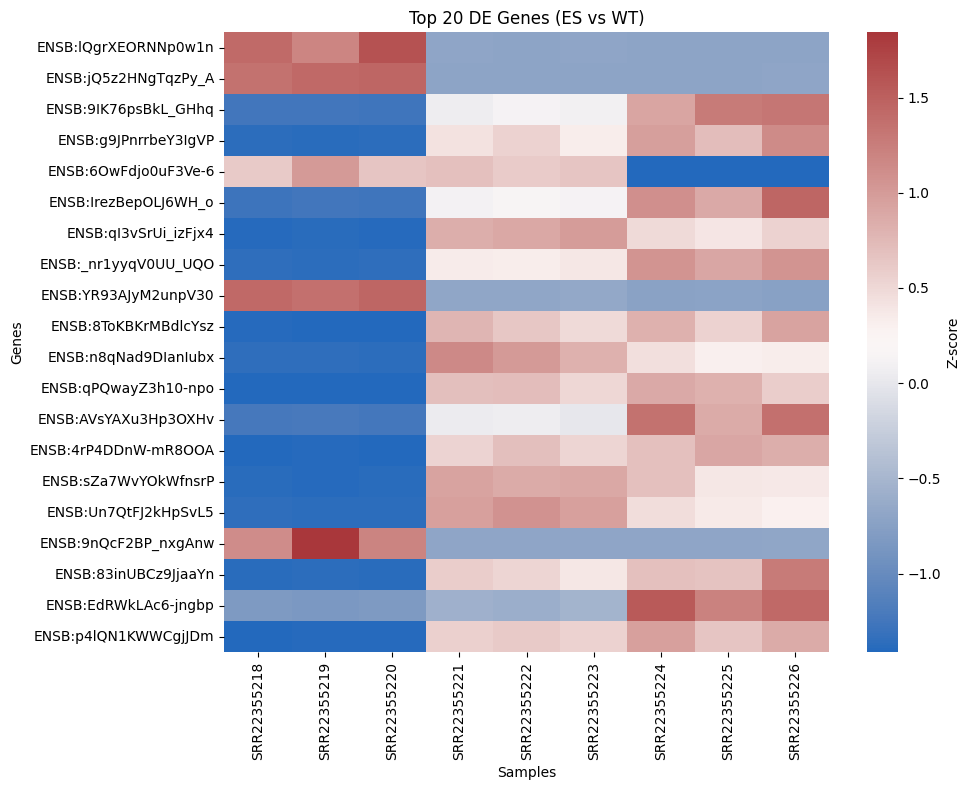

In [11]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

norm_counts = pd.read_csv("./results/normalized_counts.csv", index_col=0)

norm_counts.head(), norm_counts.shape

top_genes = df_es_vs_wt.sort_values("padj").head(20)["gene"].values

top_counts = norm_counts.loc[top_genes]

scaler = StandardScaler()
top_counts_scaled = pd.DataFrame(
    scaler.fit_transform(top_counts.T).T,
    index=top_counts.index,
    columns=top_counts.columns
)

plt.figure(figsize=(10, 8))
sns.heatmap(top_counts_scaled, cmap="vlag", xticklabels=True, yticklabels=True, cbar_kws={'label': 'Z-score'})
plt.title("Top 20 DE Genes (ES vs WT)")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.tight_layout()
plt.savefig(f"./results/heatmap_top_20_genes.png", dpi=300)
plt.show()